In [1]:
import numpy as np
from copy import copy
import random
import time
import math
import sympy as sy
import itertools
from fractions import Fraction
import requests
from bs4 import BeautifulSoup
from IPython.display import Markdown, display,IFrame,HTML,Image

In [2]:
url='https://www.janestreet.com/puzzles/robot-archery-index/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
display(Markdown('### Puzzle as published \n https://www.janestreet.com/puzzles/robot-archery-index/'))
HTML(str(soup.find('div', {'class' :'inner-wrapper'})))
# used a tree to work out the probability. Have worked through the published solution at the bottom in sympy. 

### Puzzle as published 
 https://www.janestreet.com/puzzles/robot-archery-index/

In [3]:
# build out the probability tree
def tree(p,stopper):
    game = [(np.ones(p),Fraction(1,1),1,1)]  # live players,probability, number of shots, next player
    result = []
    
    while len(game) >0:
        (players,prob,num,x) = game.pop()
        if np.sum(players) ==1:
            result.append([np.argmax(players)+1,prob])
        elif num >stopper:
            result.append([0,prob])
        else:
            num +=1
            pass_prob = prob * Fraction(1,num)
            fail_prob = prob * Fraction(num-1,num)
            fail_players = copy(players)
            fail_players[x] = 0
            nextp = (x +1) % p
            while players[nextp] ==0:
                nextp = (nextp +1) % p
            game.append([players,pass_prob,num,nextp])
            game.append([fail_players,fail_prob,num,nextp])
    print(len(result),"total paths")
    return [(n,float(np.sum([j for i,j in result if i==n])))for n in range(p+1)]


In [4]:
output = tree(4,18)
for i in range(5):
    print("Player {} has a {:.10f} probability".format(output[i][0],output[i][1]))

988 total paths
Player 0 has a 0.0000000000 probability
Player 1 has a 0.3711532348 probability
Player 2 has a 0.2421885526 probability
Player 3 has a 0.2032205617 probability
Player 4 has a 0.1834376509 probability


### Solution as published 
 https://www.janestreet.com/puzzles/robot-archery-solution/

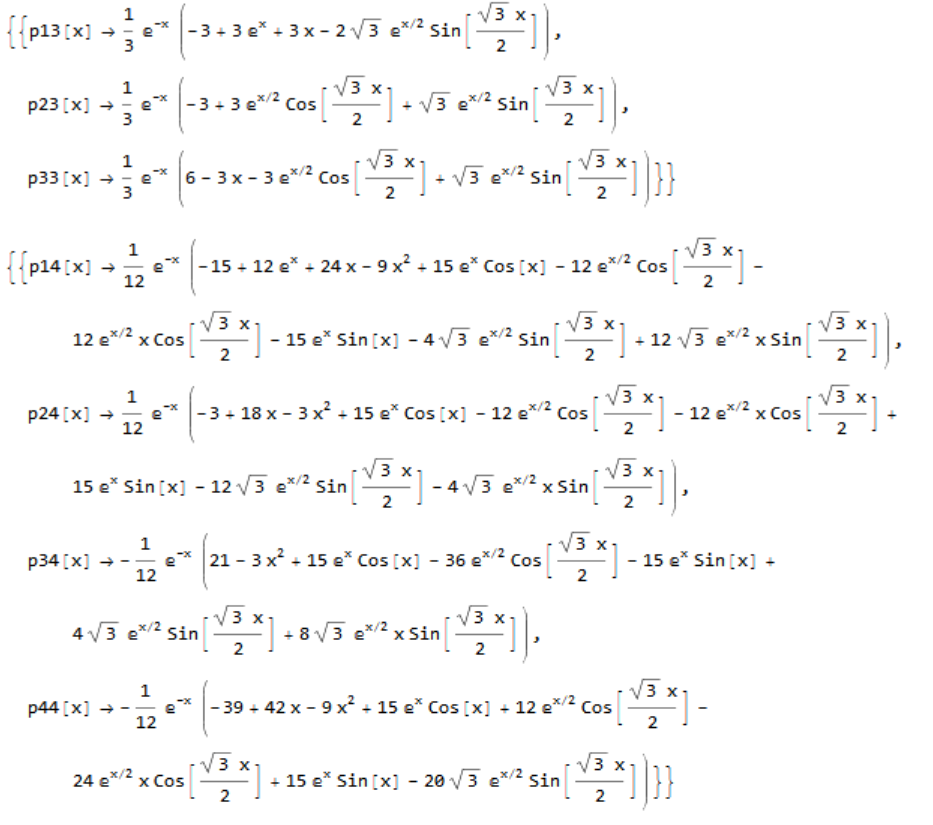

In [5]:
url='https://www.janestreet.com/puzzles/robot-archery-solution/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
display(Markdown('### Solution as published \n https://www.janestreet.com/puzzles/robot-archery-solution/'))
display(Image('https://www.janestreet.com/puzzles/2021-12-01-robot-archery-solution.png',width=500))
display(HTML(str(soup.find_all('div', {'class' :'inner-wrapper'})[1])))

In [6]:
# Try to work through the solution given
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

def disp(eq,comments=""):
    display(Markdown('\n{}&emsp; $\n'.format(comments)+sy.latex(eval(eq))+'$ &emsp;&emsp;&emsp; ***[ {} ]***\n\n'.format(eq)))

#set up symbols
x,u= sy.symbols('x u')
# set up functions
probs = sum([["P_"+str(j+1)+str(i) for j in range(i)] for i in range(2,5) ],[])

for i in probs:
    locals()[i] =sy.Function(i) 

# 2 player case,starting conditions
eq1 = sy.Eq(P_12(x) + P_22(x),1)
eq2 = sy.Eq(P_12(0),0)
eq3 = sy.Eq(P_12(x),sy.Integral(P_22(u),(u,0,x)))
display(Markdown("***Initial Conditions***"))
disp("eq1")
disp("eq2")
disp("eq3")

eq4 = sy.Eq(sy.diff(eq3.lhs,x),sy.diff(eq3.rhs,x))
eq5 = sy.Eq(P_12(x),sy.solve([eq1,eq2,eq4])[0][P_12(x)])
disp("eq5","Differentiate $eq3$ and substitute into $eq1$:")
eq6 = sy.dsolve(eq5,ics={P_12(0):0})
disp("eq6","Solving differential equation in $eq5$ gives:")
display(eq6.subs(x,1).evalf())
eq6_1 = sy.Eq(P_22(x),sy.solve([eq1,eq6])[0][P_22(x)])
disp("eq6_1","and from $eq1$:")
display(eq6_1.subs(x,1).evalf())              

***Initial Conditions***


&emsp; $
\operatorname{P_{12}}{\left(x \right)} + \operatorname{P_{22}}{\left(x \right)} = 1$ &emsp;&emsp;&emsp; ***[ eq1 ]***




&emsp; $
\operatorname{P_{12}}{\left(0 \right)} = 0$ &emsp;&emsp;&emsp; ***[ eq2 ]***




&emsp; $
\operatorname{P_{12}}{\left(x \right)} = \int\limits_{0}^{x} \operatorname{P_{22}}{\left(u \right)}\, du$ &emsp;&emsp;&emsp; ***[ eq3 ]***




Differentiate $eq3$ and substitute into $eq1$:&emsp; $
\operatorname{P_{12}}{\left(x \right)} = 1 - \frac{d}{d x} \operatorname{P_{12}}{\left(x \right)}$ &emsp;&emsp;&emsp; ***[ eq5 ]***




Solving differential equation in $eq5$ gives:&emsp; $
\operatorname{P_{12}}{\left(x \right)} = 1 - e^{- x}$ &emsp;&emsp;&emsp; ***[ eq6 ]***



Eq(P_12(1), 0.632120558828558)


and from $eq1$:&emsp; $
\operatorname{P_{22}}{\left(x \right)} = e^{- x}$ &emsp;&emsp;&emsp; ***[ eq6_1 ]***



Eq(P_22(1), 0.367879441171442)

In [7]:
display(Markdown("***Expand to 3 player***"))
eq7 = sy.Eq(P_13(x),sy.Integral(P_33(u),(u,0,x)))
eq8 = sy.Eq(P_23(x),(1-x)*P_12(x)+sy.Integral(P_13(u),(u,0,x)))
eq9 = sy.Eq(P_13(x) + P_23(x) + P_33(x),1)
eq10 = sy.Eq(P_13(0),0)
eq11 = sy.Eq(P_23(0),0)
disp("eq7")
disp("eq8")
disp("eq9")
disp("eq10")
disp("eq11")

***Expand to 3 player***


&emsp; $
\operatorname{P_{13}}{\left(x \right)} = \int\limits_{0}^{x} \operatorname{P_{33}}{\left(u \right)}\, du$ &emsp;&emsp;&emsp; ***[ eq7 ]***




&emsp; $
\operatorname{P_{23}}{\left(x \right)} = \left(1 - x\right) \operatorname{P_{12}}{\left(x \right)} + \int\limits_{0}^{x} \operatorname{P_{13}}{\left(u \right)}\, du$ &emsp;&emsp;&emsp; ***[ eq8 ]***




&emsp; $
\operatorname{P_{13}}{\left(x \right)} + \operatorname{P_{23}}{\left(x \right)} + \operatorname{P_{33}}{\left(x \right)} = 1$ &emsp;&emsp;&emsp; ***[ eq9 ]***




&emsp; $
\operatorname{P_{13}}{\left(0 \right)} = 0$ &emsp;&emsp;&emsp; ***[ eq10 ]***




&emsp; $
\operatorname{P_{23}}{\left(0 \right)} = 0$ &emsp;&emsp;&emsp; ***[ eq11 ]***



In [8]:
eq12 = sy.Eq(sy.diff(eq7.rhs,x),sy.diff(eq7.lhs,x))
eq13 = sy.Eq(P_13(x),sy.solve([eq6,eq8,eq9,eq12])[0][P_13(x)])
eq14 = sy.Eq(sy.diff(eq13.lhs,x),sy.diff(eq13.rhs,x))
disp("eq12",comments ="Diffentiate both sides of $eq7$:")
disp("eq13",comments ="Solve for $eq6/eq8/eq9/eq12$ gives:")
disp("eq14",comments ="Diffentiate both sides of $eq13$:")

eq15 = sy.dsolve(eq14,ics={P_13(0):0,P_13(x).diff(x).subs(x,0):1})
disp("eq15",comments="Solving ...")
display(eq15.subs(x,1).evalf())


Diffentiate both sides of $eq7$:&emsp; $
\operatorname{P_{33}}{\left(x \right)} = \frac{d}{d x} \operatorname{P_{13}}{\left(x \right)}$ &emsp;&emsp;&emsp; ***[ eq12 ]***




Solve for $eq6/eq8/eq9/eq12$ gives:&emsp; $
\operatorname{P_{13}}{\left(x \right)} = x - x e^{- x} - \frac{d}{d x} \operatorname{P_{13}}{\left(x \right)} - \int\limits_{0}^{x} \operatorname{P_{13}}{\left(u \right)}\, du + e^{- x}$ &emsp;&emsp;&emsp; ***[ eq13 ]***




Diffentiate both sides of $eq13$:&emsp; $
\frac{d}{d x} \operatorname{P_{13}}{\left(x \right)} = x e^{- x} - \operatorname{P_{13}}{\left(x \right)} - \frac{d^{2}}{d x^{2}} \operatorname{P_{13}}{\left(x \right)} + 1 - 2 e^{- x}$ &emsp;&emsp;&emsp; ***[ eq14 ]***




Solving ...&emsp; $
\operatorname{P_{13}}{\left(x \right)} = \left(x - 1\right) e^{- x} + 1 - \frac{2 \sqrt{3} e^{- \frac{x}{2}} \sin{\left(\frac{\sqrt{3} x}{2} \right)}}{3}$ &emsp;&emsp;&emsp; ***[ eq15 ]***



Eq(P_13(1), 0.466492804885307)

In [9]:
disp("eq12",comments="Now we have $P_{13}$ we can use this to work out $P_{33}$ as:")

eq16 =sy.Eq(P_33(x),eq15.rhs.diff(x))
disp("eq16",comments="Which gives:" )
display(eq16.subs(x,1).evalf())


Now we have $P_{13}$ we can use this to work out $P_{33}$ as:&emsp; $
\operatorname{P_{33}}{\left(x \right)} = \frac{d}{d x} \operatorname{P_{13}}{\left(x \right)}$ &emsp;&emsp;&emsp; ***[ eq12 ]***




Which gives:&emsp; $
\operatorname{P_{33}}{\left(x \right)} = - \left(x - 1\right) e^{- x} + e^{- x} + \frac{\sqrt{3} e^{- \frac{x}{2}} \sin{\left(\frac{\sqrt{3} x}{2} \right)}}{3} - e^{- \frac{x}{2}} \cos{\left(\frac{\sqrt{3} x}{2} \right)}$ &emsp;&emsp;&emsp; ***[ eq16 ]***



Eq(P_33(1), 0.241686482894434)

In [10]:
eq17 =sy.Eq(P_23(x),1-eq16.rhs-eq15.rhs)
disp("eq17","Using $Eq9$ now we have $P_{12}$ and $P_{33}$ we get :")
display(eq17.subs(x,1).evalf())


Using $Eq9$ now we have $P_{12}$ and $P_{33}$ we get :&emsp; $
\operatorname{P_{23}}{\left(x \right)} = - e^{- x} + \frac{\sqrt{3} e^{- \frac{x}{2}} \sin{\left(\frac{\sqrt{3} x}{2} \right)}}{3} + e^{- \frac{x}{2}} \cos{\left(\frac{\sqrt{3} x}{2} \right)}$ &emsp;&emsp;&emsp; ***[ eq17 ]***



Eq(P_23(1), 0.291820712220259)

In [11]:
#Check vs tree
output = tree(3,18)
for i in range(4):
    print("Player {} has a {:.10f} probability".format(output[i][0],output[i][1]))

172 total paths
Player 0 has a 0.0000000000 probability
Player 1 has a 0.4664928049 probability
Player 2 has a 0.2918207122 probability
Player 3 has a 0.2416864829 probability


In [12]:
eq18 = sy.Eq(P_14(x),sy.Integral(P_44(u),(u,0,x)))
eq19 = sy.Eq(P_24(x),(1-x)*P_13(x)+sy.Integral(P_14(u),(u,0,x)))
eq20 = sy.Eq(P_34(x),(1-x)*P_23(x)+sy.Integral(P_24(u),(u,0,x)))
eq21 = sy.Eq(P_14(x) + P_24(x) + P_34(x) + P_44(x),1)
eq22 = sy.Eq(P_14(0),0)
eq23 = sy.Eq(P_24(0),0)
eq24 = sy.Eq(P_34(0),0)
eq24_1 = sy.Eq(P_44(0),1)
display(Markdown("**From the 3 player game we have**"))
disp("eq15")
disp("eq17")
display(Markdown("**And on to 4 player**"))
disp("eq18")
disp("eq19")
disp("eq20")
disp("eq21")
disp("eq22")
disp("eq23")
disp("eq24")
disp("eq24_1","$\implies$")

**From the 3 player game we have**


&emsp; $
\operatorname{P_{13}}{\left(x \right)} = \left(x - 1\right) e^{- x} + 1 - \frac{2 \sqrt{3} e^{- \frac{x}{2}} \sin{\left(\frac{\sqrt{3} x}{2} \right)}}{3}$ &emsp;&emsp;&emsp; ***[ eq15 ]***




&emsp; $
\operatorname{P_{23}}{\left(x \right)} = - e^{- x} + \frac{\sqrt{3} e^{- \frac{x}{2}} \sin{\left(\frac{\sqrt{3} x}{2} \right)}}{3} + e^{- \frac{x}{2}} \cos{\left(\frac{\sqrt{3} x}{2} \right)}$ &emsp;&emsp;&emsp; ***[ eq17 ]***



**And on to 4 player**


&emsp; $
\operatorname{P_{14}}{\left(x \right)} = \int\limits_{0}^{x} \operatorname{P_{44}}{\left(u \right)}\, du$ &emsp;&emsp;&emsp; ***[ eq18 ]***




&emsp; $
\operatorname{P_{24}}{\left(x \right)} = \left(1 - x\right) \operatorname{P_{13}}{\left(x \right)} + \int\limits_{0}^{x} \operatorname{P_{14}}{\left(u \right)}\, du$ &emsp;&emsp;&emsp; ***[ eq19 ]***




&emsp; $
\operatorname{P_{34}}{\left(x \right)} = \left(1 - x\right) \operatorname{P_{23}}{\left(x \right)} + \int\limits_{0}^{x} \operatorname{P_{24}}{\left(u \right)}\, du$ &emsp;&emsp;&emsp; ***[ eq20 ]***




&emsp; $
\operatorname{P_{14}}{\left(x \right)} + \operatorname{P_{24}}{\left(x \right)} + \operatorname{P_{34}}{\left(x \right)} + \operatorname{P_{44}}{\left(x \right)} = 1$ &emsp;&emsp;&emsp; ***[ eq21 ]***




&emsp; $
\operatorname{P_{14}}{\left(0 \right)} = 0$ &emsp;&emsp;&emsp; ***[ eq22 ]***




&emsp; $
\operatorname{P_{24}}{\left(0 \right)} = 0$ &emsp;&emsp;&emsp; ***[ eq23 ]***




&emsp; $
\operatorname{P_{34}}{\left(0 \right)} = 0$ &emsp;&emsp;&emsp; ***[ eq24 ]***




$\implies$&emsp; $
\operatorname{P_{44}}{\left(0 \right)} = 1$ &emsp;&emsp;&emsp; ***[ eq24_1 ]***



In [13]:
eq25 = sy.Eq(sy.diff(eq18.rhs,x),sy.diff(eq18.lhs,x))
eq26 = eq19.subs(eq15.lhs,eq15.rhs)
eq27 = eq20.subs(eq17.lhs,eq17.rhs)
eq28 = eq26.subs(x,u)
disp("eq25",comments ="Diffentiate both sides of $eq18$:")
disp("eq26",comments ="Subsitute the solution for $P_{13}$ into $eq19$:")
disp("eq27",comments ="Subsitute the solution for $P_{23}$ into $eq20$:")
disp("eq28",comments ="Change variable in $eq26$:")

eq29 = eq27.subs(eq28.lhs,eq28.rhs)
disp("eq29",comments ="Substitute into $eq27$:")


Diffentiate both sides of $eq18$:&emsp; $
\operatorname{P_{44}}{\left(x \right)} = \frac{d}{d x} \operatorname{P_{14}}{\left(x \right)}$ &emsp;&emsp;&emsp; ***[ eq25 ]***




Subsitute the solution for $P_{13}$ into $eq19$:&emsp; $
\operatorname{P_{24}}{\left(x \right)} = \left(1 - x\right) \left(\left(x - 1\right) e^{- x} + 1 - \frac{2 \sqrt{3} e^{- \frac{x}{2}} \sin{\left(\frac{\sqrt{3} x}{2} \right)}}{3}\right) + \int\limits_{0}^{x} \operatorname{P_{14}}{\left(u \right)}\, du$ &emsp;&emsp;&emsp; ***[ eq26 ]***




Subsitute the solution for $P_{23}$ into $eq20$:&emsp; $
\operatorname{P_{34}}{\left(x \right)} = \left(1 - x\right) \left(- e^{- x} + \frac{\sqrt{3} e^{- \frac{x}{2}} \sin{\left(\frac{\sqrt{3} x}{2} \right)}}{3} + e^{- \frac{x}{2}} \cos{\left(\frac{\sqrt{3} x}{2} \right)}\right) + \int\limits_{0}^{x} \operatorname{P_{24}}{\left(u \right)}\, du$ &emsp;&emsp;&emsp; ***[ eq27 ]***




Change variable in $eq26$:&emsp; $
\operatorname{P_{24}}{\left(u \right)} = \left(1 - u\right) \left(\left(u - 1\right) e^{- u} + 1 - \frac{2 \sqrt{3} e^{- \frac{u}{2}} \sin{\left(\frac{\sqrt{3} u}{2} \right)}}{3}\right) + \int\limits_{0}^{u} \operatorname{P_{14}}{\left(u \right)}\, du$ &emsp;&emsp;&emsp; ***[ eq28 ]***




Substitute into $eq27$:&emsp; $
\operatorname{P_{34}}{\left(x \right)} = \left(1 - x\right) \left(- e^{- x} + \frac{\sqrt{3} e^{- \frac{x}{2}} \sin{\left(\frac{\sqrt{3} x}{2} \right)}}{3} + e^{- \frac{x}{2}} \cos{\left(\frac{\sqrt{3} x}{2} \right)}\right) + \int\limits_{0}^{x} \left(\left(1 - u\right) \left(\left(u - 1\right) e^{- u} + 1 - \frac{2 \sqrt{3} e^{- \frac{u}{2}} \sin{\left(\frac{\sqrt{3} u}{2} \right)}}{3}\right) + \int\limits_{0}^{u} \operatorname{P_{14}}{\left(u \right)}\, du\right)\, du$ &emsp;&emsp;&emsp; ***[ eq29 ]***



In [14]:
eq30 = sy.Eq(P_14(x),1-eq26.rhs-eq29.rhs-eq25.rhs)
disp("eq30",comments ="Substituting $eq26/29/25$ into $eq21$ gives:\n\n")

eq31 = sy.Eq(sy.diff(eq30.lhs,x,2),sy.diff(eq30.rhs,x,2))
disp("eq31",comments =" differentiating $eq30$ twice gives:\n\n")


Substituting $eq26/29/25$ into $eq21$ gives:

&emsp; $
\operatorname{P_{14}}{\left(x \right)} = - \left(1 - x\right) \left(\left(x - 1\right) e^{- x} + 1 - \frac{2 \sqrt{3} e^{- \frac{x}{2}} \sin{\left(\frac{\sqrt{3} x}{2} \right)}}{3}\right) - \left(1 - x\right) \left(- e^{- x} + \frac{\sqrt{3} e^{- \frac{x}{2}} \sin{\left(\frac{\sqrt{3} x}{2} \right)}}{3} + e^{- \frac{x}{2}} \cos{\left(\frac{\sqrt{3} x}{2} \right)}\right) - \frac{d}{d x} \operatorname{P_{14}}{\left(x \right)} - \int\limits_{0}^{x} \left(\left(1 - u\right) \left(\left(u - 1\right) e^{- u} + 1 - \frac{2 \sqrt{3} e^{- \frac{u}{2}} \sin{\left(\frac{\sqrt{3} u}{2} \right)}}{3}\right) + \int\limits_{0}^{u} \operatorname{P_{14}}{\left(u \right)}\, du\right)\, du - \int\limits_{0}^{x} \operatorname{P_{14}}{\left(u \right)}\, du + 1$ &emsp;&emsp;&emsp; ***[ eq30 ]***




 differentiating $eq30$ twice gives:

&emsp; $
\frac{d^{2}}{d x^{2}} \operatorname{P_{14}}{\left(x \right)} = - \frac{\left(x - 1\right) \left(3 e^{- x} - \sqrt{3} e^{- \frac{x}{2}} \sin{\left(\frac{\sqrt{3} x}{2} \right)} + 3 e^{- \frac{x}{2}} \cos{\left(\frac{\sqrt{3} x}{2} \right)}\right)}{3} + \frac{\left(x - 1\right) \left(3 \left(x - 1\right) e^{- x} - 6 e^{- x} + \sqrt{3} e^{- \frac{x}{2}} \sin{\left(\frac{\sqrt{3} x}{2} \right)} + 3 e^{- \frac{x}{2}} \cos{\left(\frac{\sqrt{3} x}{2} \right)}\right)}{3} - \frac{\left(x - 1\right) \left(3 \left(x - 1\right) e^{- x} - 3 e^{- x} - \sqrt{3} e^{- \frac{x}{2}} \sin{\left(\frac{\sqrt{3} x}{2} \right)} + 3 e^{- \frac{x}{2}} \cos{\left(\frac{\sqrt{3} x}{2} \right)}\right)}{3} - \left(x - 1\right) e^{- x} - \operatorname{P_{14}}{\left(x \right)} - \frac{d}{d x} \operatorname{P_{14}}{\left(x \right)} - \frac{d^{3}}{d x^{3}} \operatorname{P_{14}}{\left(x \right)} + 1 + 4 e^{- x} - \frac{4 \sqrt{3} e^{- \frac{x}{2}} \sin{\left(\frac{\sqrt{3} x}{2} \right)}}{3} - 2 e^{- \frac{x}{2}} \cos{\left(\frac{\sqrt{3} x}{2} \right)}$ &emsp;&emsp;&emsp; ***[ eq31 ]***



In [15]:
eq31_1 = sy.Eq(sy.diff(eq30.lhs,x,1),sy.diff(eq30.rhs,x,1)).subs(x,0).doit()
disp("eq31_1",comments ="**Need one more boundary condition**\n\n ... differentiating $eq30$ once and substituting $x=0$ gives:\n\n")
eq31_2 = eq31_1.subs([(P_14(0),0),(P_14(x).diff(x).subs(x,0),1)])

disp("eq31_2",comments ="Using $P_{14}(0)=0$ and  $"+sy.latex(sy.Eq(eq25.rhs,eq25.lhs))+"$ and $P_{44}(0)=1$ gives:\n\n")

eq31_3 = sy.Eq((eq31_2.rhs+2)*-1,(eq31_2.lhs+2)*-1)
disp("eq31_3",comments ="$\implies$")



**Need one more boundary condition**

 ... differentiating $eq30$ once and substituting $x=0$ gives:

&emsp; $
\left. \frac{d}{d x} \operatorname{P_{14}}{\left(x \right)} \right|_{\substack{ x=0 }} = - \operatorname{P_{14}}{\left(0 \right)} - \left. \frac{d^{2}}{d x^{2}} \operatorname{P_{14}}{\left(x \right)} \right|_{\substack{ x=0 }} - 2$ &emsp;&emsp;&emsp; ***[ eq31_1 ]***




Using $P_{14}(0)=0$ and  $\frac{d}{d x} \operatorname{P_{14}}{\left(x \right)} = \operatorname{P_{44}}{\left(x \right)}$ and $P_{44}(0)=1$ gives:

&emsp; $
1 = - \left. \frac{d^{2}}{d x^{2}} \operatorname{P_{14}}{\left(x \right)} \right|_{\substack{ x=0 }} - 2$ &emsp;&emsp;&emsp; ***[ eq31_2 ]***




$\implies$&emsp; $
\left. \frac{d^{2}}{d x^{2}} \operatorname{P_{14}}{\left(x \right)} \right|_{\substack{ x=0 }} = -3$ &emsp;&emsp;&emsp; ***[ eq31_3 ]***



In [16]:
eq33_4 = sy.Eq(eq25.rhs,eq25.lhs).subs(x,0).subs(eq24_1.lhs,eq24_1.rhs)
eq32 = sy.dsolve(eq31,ics={P_14(0):0,P_14(x).diff(x).subs(x,0):1,P_14(x).diff(x,2).subs(x,0):-3})
disp("eq32",comments ="Solving $eq31$ using $"+sy.latex(eq22)+"$ , $"+sy.latex(eq33_4)+
     "$ and $"+sy.latex(eq31_3)+"$ solution gives:\n\n")
display(eq32.subs(x,1).evalf())


Solving $eq31$ using $\operatorname{P_{14}}{\left(0 \right)} = 0$ , $\left. \frac{d}{d x} \operatorname{P_{14}}{\left(x \right)} \right|_{\substack{ x=0 }} = 1$ and $\left. \frac{d^{2}}{d x^{2}} \operatorname{P_{14}}{\left(x \right)} \right|_{\substack{ x=0 }} = -3$ solution gives:

&emsp; $
\operatorname{P_{14}}{\left(x \right)} = - \frac{x \cos{\left(\frac{\sqrt{3} x}{2} \right)}}{\sqrt{e^{x}}} + \sqrt{3} x e^{- \frac{x}{2}} \sin{\left(\frac{\sqrt{3} x}{2} \right)} + \left(- \frac{3 x^{2}}{4} + 2 x - \frac{5}{4}\right) e^{- x} - \frac{5 \sin{\left(x \right)}}{4} + \frac{5 \cos{\left(x \right)}}{4} + 1 - \frac{\cos{\left(\frac{\sqrt{3} x}{2} \right)}}{\sqrt{e^{x}}} - \frac{\sqrt{3} e^{- \frac{x}{2}} \sin{\left(\frac{\sqrt{3} x}{2} \right)}}{3}$ &emsp;&emsp;&emsp; ***[ eq32 ]***



Eq(P_14(1), 0.371153234771287)

In [17]:
eq33 = sy.Eq(P_44(x),eq32.rhs.diff(x))
disp("eq33","differentiate to get $P_{44}$:")
display(eq33.subs(x,1).evalf())


differentiate to get $P_{44}$:&emsp; $
\operatorname{P_{44}}{\left(x \right)} = \frac{\sqrt{3} x \sin{\left(\frac{\sqrt{3} x}{2} \right)}}{2 \sqrt{e^{x}}} + \frac{x \cos{\left(\frac{\sqrt{3} x}{2} \right)}}{2 \sqrt{e^{x}}} - \frac{\sqrt{3} x e^{- \frac{x}{2}} \sin{\left(\frac{\sqrt{3} x}{2} \right)}}{2} + \frac{3 x e^{- \frac{x}{2}} \cos{\left(\frac{\sqrt{3} x}{2} \right)}}{2} + \left(2 - \frac{3 x}{2}\right) e^{- x} - \left(- \frac{3 x^{2}}{4} + 2 x - \frac{5}{4}\right) e^{- x} - \frac{5 \sin{\left(x \right)}}{4} - \frac{5 \cos{\left(x \right)}}{4} + \frac{\sqrt{3} \sin{\left(\frac{\sqrt{3} x}{2} \right)}}{2 \sqrt{e^{x}}} - \frac{\cos{\left(\frac{\sqrt{3} x}{2} \right)}}{2 \sqrt{e^{x}}} + \frac{7 \sqrt{3} e^{- \frac{x}{2}} \sin{\left(\frac{\sqrt{3} x}{2} \right)}}{6} - \frac{e^{- \frac{x}{2}} \cos{\left(\frac{\sqrt{3} x}{2} \right)}}{2}$ &emsp;&emsp;&emsp; ***[ eq33 ]***



Eq(P_44(1), 0.183437650861763)

In [18]:
### Published soln is.
eq0 = sy.Eq(P_14(x),sy.Rational(1,12)*sy.exp(-x)* \
        (-15+12*sy.exp(x)+24*x+-9*x**2+15*sy.exp(x)*sy.cos(x)-12*sy.exp(x/2)*sy.cos(sy.sqrt(3)*x/2) 
         -12*sy.exp(x/2)*x*sy.cos(sy.sqrt(3)*x/2)-15*sy.exp(x)*sy.sin(x)-4*sy.sqrt(3)*sy.exp(x/2)*sy.sin(sy.sqrt(3)*x/2)+
         12*sy.sqrt(3)*sy.exp(x/2)*x*sy.sin(sy.sqrt(3)*x/2)))
         
        
disp("eq0","### Published solution\n")
display(eq0.subs(x,1).evalf())
eq0_1 = sy.Eq(P_44(x),eq0.rhs.diff(x))
disp("eq0_1","\ndifferentiate to get $P_{44}$\n")
display(eq0_1.subs(x,1).evalf())


### Published solution
&emsp; $
\operatorname{P_{14}}{\left(x \right)} = \frac{\left(- 9 x^{2} + 12 \sqrt{3} x e^{\frac{x}{2}} \sin{\left(\frac{\sqrt{3} x}{2} \right)} - 12 x e^{\frac{x}{2}} \cos{\left(\frac{\sqrt{3} x}{2} \right)} + 24 x - 4 \sqrt{3} e^{\frac{x}{2}} \sin{\left(\frac{\sqrt{3} x}{2} \right)} - 12 e^{\frac{x}{2}} \cos{\left(\frac{\sqrt{3} x}{2} \right)} - 15 e^{x} \sin{\left(x \right)} + 15 e^{x} \cos{\left(x \right)} + 12 e^{x} - 15\right) e^{- x}}{12}$ &emsp;&emsp;&emsp; ***[ eq0 ]***



Eq(P_14(1), 0.371153234771287)



differentiate to get $P_{44}$
&emsp; $
\operatorname{P_{44}}{\left(x \right)} = \left(\sqrt{3} x e^{\frac{x}{2}} \sin{\left(\frac{\sqrt{3} x}{2} \right)} + x e^{\frac{x}{2}} \cos{\left(\frac{\sqrt{3} x}{2} \right)} - \frac{3 x}{2} + \frac{4 \sqrt{3} e^{\frac{x}{2}} \sin{\left(\frac{\sqrt{3} x}{2} \right)}}{3} - 2 e^{\frac{x}{2}} \cos{\left(\frac{\sqrt{3} x}{2} \right)} - \frac{5 e^{x} \sin{\left(x \right)}}{2} + e^{x} + 2\right) e^{- x} - \left(- \frac{3 x^{2}}{4} + \sqrt{3} x e^{\frac{x}{2}} \sin{\left(\frac{\sqrt{3} x}{2} \right)} - x e^{\frac{x}{2}} \cos{\left(\frac{\sqrt{3} x}{2} \right)} + 2 x - \frac{\sqrt{3} e^{\frac{x}{2}} \sin{\left(\frac{\sqrt{3} x}{2} \right)}}{3} - e^{\frac{x}{2}} \cos{\left(\frac{\sqrt{3} x}{2} \right)} - \frac{5 e^{x} \sin{\left(x \right)}}{4} + \frac{5 e^{x} \cos{\left(x \right)}}{4} + e^{x} - \frac{5}{4}\right) e^{- x}$ &emsp;&emsp;&emsp; ***[ eq0_1 ]***



Eq(P_44(1), 0.183437650861764)

In [19]:
sy.Eq(eq25.rhs,eq25.lhs).subs(x,0).subs(eq24_1.lhs,eq24_1.rhs)

Eq(Subs(Derivative(P_14(x), x), x, 0), 1)